
# Naive Bayes Classifier


In this exercise We will perform classification of plants into one of the species based on the Iris datase as the training data. We use `GaussianNB` classifier.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB   # The classifier assumes normal distribution for the numerical features.
from sklearn.model_selection import train_test_split

# Loading example data
iris = datasets.load_iris()   # Use Iris Dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X = iris.data[:, [0, 2]]      # Using Sepal Length and Petal Length as features
y = iris.target

# Training classifier
gnb = GaussianNB()  # Instantiate Naive Bayes' estimator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 14,  3],
       [ 0,  1, 18]], dtype=int64)

## Visualizing decision bountries

Decision boundries can be visualized by preparing a contour plot.

In [5]:
# Generate data for contour plot
x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                     np.arange(x1_min, x1_max, 0.1))
yy = gnb.predict(np.c_[x0.ravel(), x1.ravel()])
yy = yy.reshape(x0.shape)

Next we draw a contour plot, with filled regions, using the above data.

The `levels` argument specifies three intervals

-1 < y <= 0 : represents y = 0, i.e. Setosa 

0 < y <= 1  : represents y = 1, i.e. Versicolor

1 < y <= 2  : represents y = 2, i.e. Virginica

The `contourf` function of `matplotlib` draws contour plot with filled regions, and returns a "contourset" object. The contour set object provides methods to get/set additional information about the contour plot.

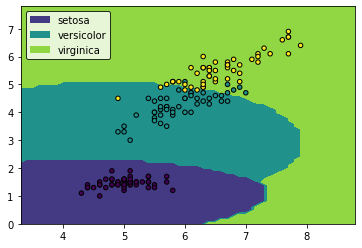

In [6]:
CS = plt.contourf(x0, x1, yy, levels = [-1, 0, 1, 2])
art, lbl = CS.legend_elements()   # get elements to be passed in to legend
lbl = iris.target_names           # relabel using appropriate labels
plt.legend(art,lbl, edgecolor = "k")
plt.scatter(X[:, 0], X[:, 1], c=y,s=20, edgecolor='k')
plt.show()

In [7]:
u = np.array([1, 2, 3])
v = np.array([2, 4, 6])
uu, vv = np.meshgrid(u, v)

In [8]:
uu

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [9]:
vv

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

In [10]:
uu.ravel()

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [11]:
np.c_[uu.ravel(), vv.ravel()]

array([[1, 2],
       [2, 2],
       [3, 2],
       [1, 4],
       [2, 4],
       [3, 4],
       [1, 6],
       [2, 6],
       [3, 6]])